### Import libraries and read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from scipy.stats import poisson
import numpy as np
import scipy.stats as stats


In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Library/CloudStorage/OneDrive-Personal/github-projects/rugby/rugby'

In [3]:
raw_df = pd.read_csv("0_data/match_data/urc_matches.csv")
raw_df

,match_date_,Home team,Away team,home_n_tries,minutes_of_home_tries,away_n_tries,minutes_of_away_tries,home_n_pen_kicks,minutes_of_home_pen_kicks,away_n_pen_kicks,...,pkey,home_score,away_score,score_diff,home_pack_weight,away_pack_weight,home_forwards_ages,home_backs_ages,away_forwards_ages,away_backs_ages
0,2021-09-24,ZEBRE,LIONS,4.0,51_61_64_57,5.0,32_19_21_15_10,0.0,NaN,1.0,...,ZEBRE_LIONS_2021-09-24,26,38,-12,924,919,26,26,27,25
1,2021-09-24,CARDIFF,CONNACHT,5.0,38_50_69_9_73,2.0,12_80,0.0,NaN,3.0,...,CARDIFF_CONNACHT_2021-09-24,33,21,12,929,892,28,27,26,26
2,2021-09-24,ULSTER,GLASGOW,5.0,22_43_48_58_3,4.0,42_14_64_54,0.0,NaN,1.0,...,ULSTER_GLASGOW_2021-09-24,35,29,6,906,912,29,26,28,26
3,2021-09-25,MUNSTER,SHARKS,6.0,43_50_35_5_78_76,2.0,56_69,2.0,28_68,1.0,...,MUNSTER_SHARKS_2021-09-25,42,17,25,907,946,28,25,26,24
4,2021-09-25,BENETTON,STORMERS,3.0,15_58_70,2.0,1_43,1.0,62,2.0,...,BENETTON_STORMERS_2021-09-25,22,18,4,909,903,24,26,27,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LEINSTER_GLASGOW_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,BULLS_DRAGONS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LIONS_OSPREYS_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZEBRE_CONNACHT_2025-05-17,-1,-1,0,-1,-1,-1,-1,-1,-1


In [4]:
raw_df.dtypes

match_date_                     object
Home team                       object
Away team                       object
home_n_tries                   float64
minutes_of_home_tries           object
away_n_tries                   float64
minutes_of_away_tries           object
home_n_pen_kicks               float64
minutes_of_home_pen_kicks       object
away_n_pen_kicks               float64
minutes_of_away_pen_kicks       object
home_n_conversions             float64
minutes_of_home_conversions     object
away_n_conversions             float64
minutes_of_away_conversions     object
competition                     object
round_stage                     object
pkey                            object
home_score                       int64
away_score                       int64
score_diff                       int64
home_pack_weight                 int64
away_pack_weight                 int64
home_forwards_ages               int64
home_backs_ages                  int64
away_forwards_ages       

In [5]:
matches = raw_df[['match_date_', 'Home team', 'Away team', 'home_n_tries', 'away_n_tries', 'pkey']].copy()

matches['Total Tries'] = matches['home_n_tries'] + matches['away_n_tries']

matches.sort_values(by='match_date_')

,match_date_,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries
0,2021-09-24,ZEBRE,LIONS,4.0,5.0,ZEBRE_LIONS_2021-09-24,9.0
1,2021-09-24,CARDIFF,CONNACHT,5.0,2.0,CARDIFF_CONNACHT_2021-09-24,7.0
2,2021-09-24,ULSTER,GLASGOW,5.0,4.0,ULSTER_GLASGOW_2021-09-24,9.0
3,2021-09-25,MUNSTER,SHARKS,6.0,2.0,MUNSTER_SHARKS_2021-09-25,8.0
4,2021-09-25,BENETTON,STORMERS,3.0,2.0,BENETTON_STORMERS_2021-09-25,5.0
...,...,...,...,...,...,...,...
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,LIONS_OSPREYS_2025-05-17,NaN
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,ZEBRE_CONNACHT_2025-05-17,NaN
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,LEINSTER_GLASGOW_2025-05-17,NaN
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,BULLS_DRAGONS_2025-05-17,NaN


In [6]:
# create a season column
mask_24_25 = (matches['match_date_'] > '2024-07-31') & (matches['match_date_'] <= '2025-07-11')
mask_23_24 = (matches['match_date_'] > '2023-07-31') & (matches['match_date_'] <= '2024-07-11')
mask_22_23 = (matches['match_date_'] > '2022-07-31') & (matches['match_date_'] <= '2023-07-11')
mask_21_22 = (matches['match_date_'] > '2021-07-31') & (matches['match_date_'] <= '2022-07-11')

matches.loc[mask_24_25, "Season"] = "24/25 (5 rounds)"
matches.loc[mask_23_24, "Season"] = "23/24"
matches.loc[mask_22_23, "Season"] = "22/23"
matches.loc[mask_21_22, "Season"] = "21/22"

matches

,match_date_,Home team,Away team,home_n_tries,away_n_tries,pkey,Total Tries,Season
0,2021-09-24,ZEBRE,LIONS,4.0,5.0,ZEBRE_LIONS_2021-09-24,9.0,21/22
1,2021-09-24,CARDIFF,CONNACHT,5.0,2.0,CARDIFF_CONNACHT_2021-09-24,7.0,21/22
2,2021-09-24,ULSTER,GLASGOW,5.0,4.0,ULSTER_GLASGOW_2021-09-24,9.0,21/22
3,2021-09-25,MUNSTER,SHARKS,6.0,2.0,MUNSTER_SHARKS_2021-09-25,8.0,21/22
4,2021-09-25,BENETTON,STORMERS,3.0,2.0,BENETTON_STORMERS_2021-09-25,5.0,21/22
...,...,...,...,...,...,...,...,...
592,2025-05-17,LEINSTER,GLASGOW,NaN,NaN,LEINSTER_GLASGOW_2025-05-17,NaN,24/25 (5 rounds)
593,2025-05-17,BULLS,DRAGONS,NaN,NaN,BULLS_DRAGONS_2025-05-17,NaN,24/25 (5 rounds)
594,2025-05-17,LIONS,OSPREYS,NaN,NaN,LIONS_OSPREYS_2025-05-17,NaN,24/25 (5 rounds)
595,2025-05-17,ZEBRE,CONNACHT,NaN,NaN,ZEBRE_CONNACHT_2025-05-17,NaN,24/25 (5 rounds)


# Historical Visualisation

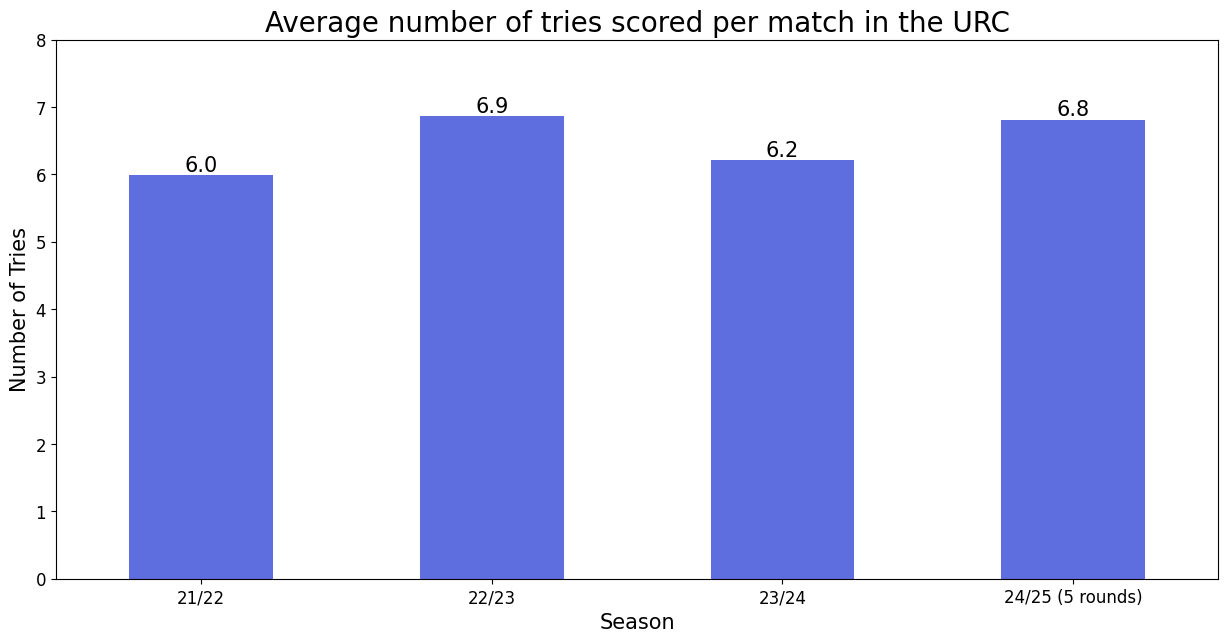

In [7]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", y="Total Tries", 
            data=matches, 
            errorbar=None, 
            fill=True,
            gap=0.01,
           width=0.5,
           color='#4A5EF3')

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average number of tries scored per match in the URC",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.show()

### Data manipulation 
- we need to reshape our dataframe so that both the home and the away team have a row each and an indicator whether they are playing at home or away

In [8]:
common_features = ['pkey', 'match_date_', 'Home team', 'Away team', 'Season']

# home data
temp1 = matches[common_features+['home_n_tries', 'away_n_tries']]
temp1['Team Location'] = "Home Team"
temp1.rename(columns={"Home team": "Team",
                    "Away team": "Opponents",
                    "home_n_tries": "Tries Scored",
                     "away_n_tries": "Tries Conceded"},
                    inplace=True)

# away data
temp2 = matches[common_features + ['away_n_tries', 'home_n_tries']]
temp2['Team Location'] = "Away Team"
temp2.rename(columns={"Away team": "Team",
                    "Home team": "Opponents",
                    "away_n_tries": "Tries Scored",
                     "home_n_tries": "Tries Conceded"},
                    inplace=True)

# concat dfs together
team_per_row_df = pd.concat([temp1, temp2])
team_per_row_df.reset_index(inplace=True, drop=True)

team_per_row_df.rename(columns={"match_date_": "Match Date",
                    "pkey": "Primary Key"},
                    inplace=True)

team_per_row_df['Match Date'] = pd.to_datetime(team_per_row_df['Match Date'])

del(temp1)
del(temp2)

team_per_row_df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Tries Conceded,Team Location
1178,SHARKS_OSPREYS_2025-05-09,2025-05-09,OSPREYS,SHARKS,24/25 (5 rounds),NaN,NaN,Away Team
1179,MUNSTER_ULSTER_2025-05-09,2025-05-09,ULSTER,MUNSTER,24/25 (5 rounds),NaN,NaN,Away Team
1180,STORMERS_DRAGONS_2025-05-10,2025-05-10,DRAGONS,STORMERS,24/25 (5 rounds),NaN,NaN,Away Team
1181,LEINSTER_ZEBRE_2025-05-10,2025-05-10,ZEBRE,LEINSTER,24/25 (5 rounds),NaN,NaN,Away Team
1182,BENETTON_GLASGOW_2025-05-10,2025-05-10,GLASGOW,BENETTON,24/25 (5 rounds),NaN,NaN,Away Team
1183,CONNACHT_EDINBURGH_2025-05-10,2025-05-10,EDINBURGH,CONNACHT,24/25 (5 rounds),NaN,NaN,Away Team
1184,BULLS_CARDIFF_2025-05-10,2025-05-10,CARDIFF,BULLS,24/25 (5 rounds),NaN,NaN,Away Team
1185,LIONS_SCARLETS_2025-05-11,2025-05-11,SCARLETS,LIONS,24/25 (5 rounds),NaN,NaN,Away Team
1186,STORMERS_CARDIFF_2025-05-16,2025-05-16,CARDIFF,STORMERS,24/25 (5 rounds),NaN,NaN,Away Team
1187,EDINBURGH_ULSTER_2025-05-16,2025-05-16,ULSTER,EDINBURGH,24/25 (5 rounds),NaN,NaN,Away Team


In [9]:
# filter out any future fixtures, only keep historical results
day_filter = "2024-10-24"

df = team_per_row_df.loc[team_per_row_df['Match Date'] < day_filter]

df = df.sort_values(by=['Match Date', 'Team Location'], ascending=[True, False])

df = df.reset_index(drop=True)

df.tail(16)

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Tries Conceded,Team Location
966,SCARLETS_BULLS_2024-10-18,2024-10-18,SCARLETS,BULLS,24/25 (5 rounds),3.0,3.0,Home Team
967,ULSTER_OSPREYS_2024-10-18,2024-10-18,ULSTER,OSPREYS,24/25 (5 rounds),6.0,2.0,Home Team
968,SCARLETS_BULLS_2024-10-18,2024-10-18,BULLS,SCARLETS,24/25 (5 rounds),3.0,3.0,Away Team
969,ULSTER_OSPREYS_2024-10-18,2024-10-18,OSPREYS,ULSTER,24/25 (5 rounds),2.0,6.0,Away Team
970,DRAGONS_BENETTON_2024-10-19,2024-10-19,DRAGONS,BENETTON,24/25 (5 rounds),3.0,4.0,Home Team
971,SHARKS_GLASGOW_2024-10-19,2024-10-19,SHARKS,GLASGOW,24/25 (5 rounds),3.0,4.0,Home Team
972,CONNACHT_LEINSTER_2024-10-19,2024-10-19,CONNACHT,LEINSTER,24/25 (5 rounds),2.0,5.0,Home Team
973,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,EDINBURGH,CARDIFF,24/25 (5 rounds),4.0,1.0,Home Team
974,ZEBRE_LIONS_2024-10-19,2024-10-19,ZEBRE,LIONS,24/25 (5 rounds),0.0,1.0,Home Team
975,STORMERS_MUNSTER_2024-10-19,2024-10-19,STORMERS,MUNSTER,24/25 (5 rounds),4.0,3.0,Home Team


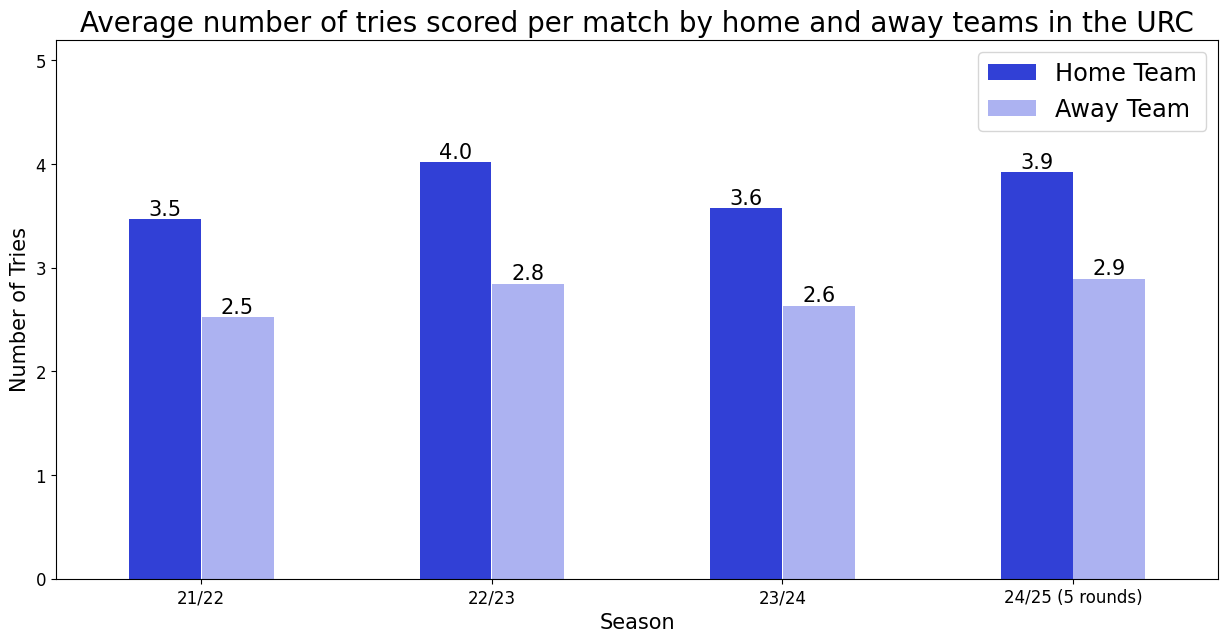

In [10]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))
# plt.grid(True)
sns.barplot(x="Season", hue="Team Location", y="Tries Scored", 
            data=df, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'])

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=15)

plt.ylim(0, 5.2)  # Set the y-axis limits from 0 to 5

ax.axes.set_title("Average number of tries scored per match by home and away teams in the URC",fontsize=20)
ax.set_xlabel("Season",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(fontsize='xx-large')

plt.show()

## Tries scored per team

In [11]:
team_tries_home_away = df.groupby(["Team", "Team Location"])['Tries Scored'].mean().round(1) \
            .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False])

team_tries_pivot = team_tries_home_away.pivot(index = ['Team'], columns='Team Location', values='Tries Scored').reset_index().rename_axis(None, axis=1)

team_tries_pivot['Difference'] = team_tries_pivot['Home Team'] - team_tries_pivot['Away Team']

team_tries_pivot.sort_values(by='Difference', ascending=False)

,Team,Away Team,Home Team,Difference
1,BULLS,3.0,5.1,2.1
8,LIONS,2.2,4.2,2.0
7,LEINSTER,3.5,5.4,1.9
9,MUNSTER,2.8,4.3,1.5
5,EDINBURGH,2.5,3.9,1.4
13,STORMERS,2.7,3.9,1.2
3,CONNACHT,2.7,3.6,0.9
12,SHARKS,2.7,3.6,0.9
14,ULSTER,2.9,3.8,0.9
2,CARDIFF,2.3,3.1,0.8


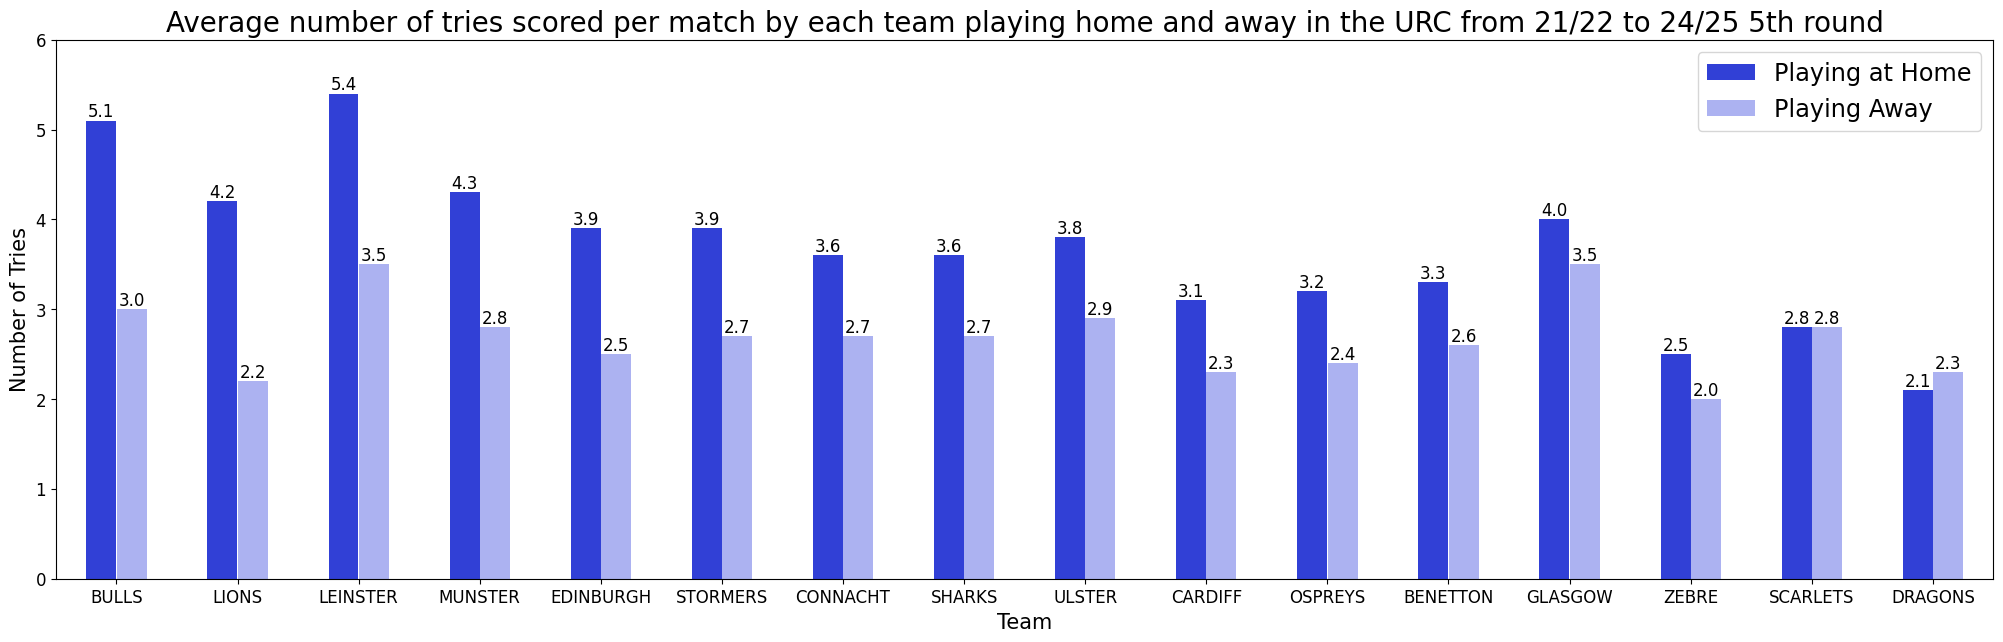

In [12]:

order = team_tries_pivot.sort_values(by='Difference', ascending=False)['Team'].tolist()

# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(25, 7))
# fig, ax = plt.subplots(1,1)

# plt.grid(True)
sns.barplot(x="Team", hue="Team Location", y="Tries Scored", 
            data=team_tries_home_away, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'],
           orient='v',
           order=order)

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=12)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=12)

plt.ylim(0, 6)  # Set the y-axis limits from 0 to 5

ax.axes.set_title("Average number of tries scored per match by each \
team playing home and away in the URC from 21/22 to 24/25 5th round",fontsize=20)
ax.set_xlabel("Team",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(['Playing at Home', 'Playing Away'], fontsize='xx-large')

plt.show()

## Tries conceded per team

In [13]:
team_tries_c_home_away = df.groupby(["Team", "Team Location"])['Tries Conceded'].mean().round(1) \
            .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False])



team_tries_c_pivot = team_tries_c_home_away.pivot(index = ['Team'], columns='Team Location', values='Tries Conceded').reset_index().rename_axis(None, axis=1)

team_tries_c_pivot['Difference'] = team_tries_c_pivot['Away Team'] - team_tries_c_pivot['Home Team']

team_tries_c_pivot.sort_values(by='Difference', ascending=True)

,Team,Away Team,Home Team,Difference
8,LIONS,3.2,3.3,-0.1
1,BULLS,2.8,2.6,0.2
9,MUNSTER,2.4,2.2,0.2
2,CARDIFF,3.7,3.3,0.4
13,STORMERS,2.7,2.2,0.5
14,ULSTER,3.1,2.3,0.8
5,EDINBURGH,3.3,2.4,0.9
7,LEINSTER,2.7,1.8,0.9
15,ZEBRE,5.8,4.7,1.1
12,SHARKS,3.6,2.5,1.1


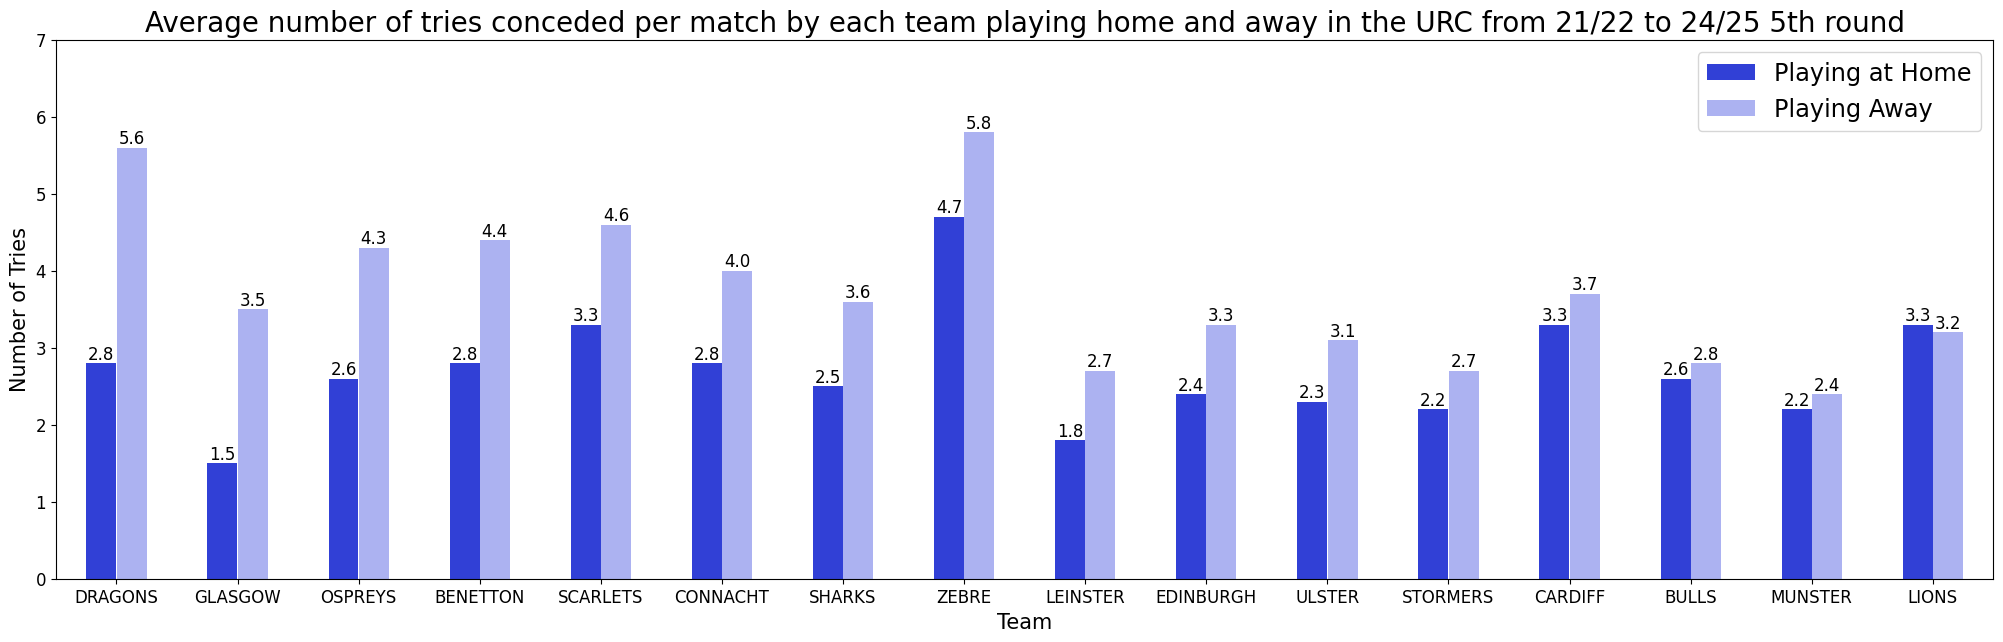

In [14]:

order = team_tries_c_pivot.sort_values(by='Difference', ascending=False)['Team'].tolist()

# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(25, 7))
# fig, ax = plt.subplots(1,1)

# plt.grid(True)
sns.barplot(x="Team", hue="Team Location", y="Tries Conceded", 
            data=team_tries_c_home_away, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.5,
            palette=['#1529F2', '#A1A9FC'],
           orient='v',
           order=order)

bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=12)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}' for value in bars_1.datavalues], fontsize=12)

plt.ylim(0, 7)  # Set the y-axis limits from 0 to 5


ax.axes.set_title("Average number of tries conceded per match by each \
team playing home and away in the URC from 21/22 to 24/25 5th round",fontsize=20)
ax.set_xlabel("Team",fontsize=15)
ax.set_ylabel("Number of Tries",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);
ax.legend(['Playing at Home', 'Playing Away'], fontsize='xx-large')

plt.show()

# Team ratings

In [15]:
df

,Primary Key,Match Date,Team,Opponents,Season,Tries Scored,Tries Conceded,Team Location
0,ZEBRE_LIONS_2021-09-24,2021-09-24,ZEBRE,LIONS,21/22,4.0,5.0,Home Team
1,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CARDIFF,CONNACHT,21/22,5.0,2.0,Home Team
2,ULSTER_GLASGOW_2021-09-24,2021-09-24,ULSTER,GLASGOW,21/22,5.0,4.0,Home Team
3,ZEBRE_LIONS_2021-09-24,2021-09-24,LIONS,ZEBRE,21/22,5.0,4.0,Away Team
4,CARDIFF_CONNACHT_2021-09-24,2021-09-24,CONNACHT,CARDIFF,21/22,2.0,5.0,Away Team
...,...,...,...,...,...,...,...,...
977,SHARKS_GLASGOW_2024-10-19,2024-10-19,GLASGOW,SHARKS,24/25 (5 rounds),4.0,3.0,Away Team
978,CONNACHT_LEINSTER_2024-10-19,2024-10-19,LEINSTER,CONNACHT,24/25 (5 rounds),5.0,2.0,Away Team
979,EDINBURGH_CARDIFF_2024-10-19,2024-10-19,CARDIFF,EDINBURGH,24/25 (5 rounds),1.0,4.0,Away Team
980,ZEBRE_LIONS_2024-10-19,2024-10-19,LIONS,ZEBRE,24/25 (5 rounds),1.0,0.0,Away Team


In [16]:
# Let's remove the last 16 rows which relate to round 5 of the 23/24 season - we can use this to compare against our predictions

rows = 16

test = df.iloc[-rows:]
train = df.iloc[:-rows]

print(train.shape)
print(test.shape)

(966, 8)
(16, 8)


In [17]:

# average tries scored home and away
home_avg_tries_scored = train.groupby('Team Location')['Tries Scored'].mean()['Home Team']
away_avg_tries_scored = train.groupby('Team Location')['Tries Scored'].mean()['Away Team']

# average tries conceded home and away
home_avg_tries_conceded = train.groupby('Team Location')['Tries Conceded'].mean()['Home Team']
away_avg_tries_conceded = train.groupby('Team Location')['Tries Conceded'].mean()['Away Team']

home_avg_tries_scored, away_avg_tries_scored, home_avg_tries_conceded, away_avg_tries_conceded

(3.7163561076604554,
 2.6832298136645965,
 2.6832298136645965,
 3.7163561076604554)

In [18]:
# we need to recalculate our tries scored averages up until the 5th round of 23/24

train_tries_scored_by_team = train.groupby(["Team", "Team Location"])['Tries Scored'].mean() \
            .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False]) \
            .pivot(index = ['Team'], columns='Team Location', values='Tries Scored').reset_index().rename_axis(None, axis=1)

train_tries_scored_by_team

,Team,Away Team,Home Team
0,BENETTON,2.517241,3.333333
1,BULLS,2.967742,5.090909
2,CARDIFF,2.357143,3.100000
3,CONNACHT,2.656250,3.678571
4,DRAGONS,2.321429,2.066667
5,EDINBURGH,2.466667,3.931034
6,GLASGOW,3.437500,4.032258
7,LEINSTER,3.466667,5.441176
8,LIONS,2.250000,4.206897
9,MUNSTER,2.787879,4.258065


In [19]:
# we need to recalculate our tries conceded averages up until the 5th round of 23/24
train_tries_conceded_by_team = train.groupby(["Team", "Team Location"])['Tries Conceded'].mean() \
                        .reset_index().sort_values(by=['Team', 'Team Location'], ascending=[True, False]) \
                        .pivot(index = ['Team'], columns='Team Location', values='Tries Conceded').reset_index().rename_axis(None, axis=1)

train_tries_conceded_by_team

,Team,Away Team,Home Team
0,BENETTON,4.448276,2.833333
1,BULLS,2.838710,2.636364
2,CARDIFF,3.678571,3.300000
3,CONNACHT,4.000000,2.714286
4,DRAGONS,5.571429,2.800000
5,EDINBURGH,3.333333,2.448276
6,GLASGOW,3.500000,1.516129
7,LEINSTER,2.766667,1.823529
8,LIONS,3.357143,3.310345
9,MUNSTER,2.363636,2.225806


In [20]:
temp1 = train_tries_scored_by_team[['Team', 'Away Team', 'Home Team']].copy()
temp1.rename(columns={"Home Team": "Average Tries Scored Home",
                      "Away Team": "Average Tries Scored Away"
                    },
           inplace=True)

temp2 = train_tries_conceded_by_team[['Team', 'Away Team', 'Home Team']].copy()
temp2.rename(columns={"Home Team": "Average Tries Conceded Home",
                     "Away Team": "Average Tries Conceded Away"}
                    ,
           inplace=True)


poisson_df = pd.merge(temp1, temp2)

del(temp1, temp2)

poisson_df

,Team,Average Tries Scored Away,Average Tries Scored Home,Average Tries Conceded Away,Average Tries Conceded Home
0,BENETTON,2.517241,3.333333,4.448276,2.833333
1,BULLS,2.967742,5.090909,2.838710,2.636364
2,CARDIFF,2.357143,3.100000,3.678571,3.300000
3,CONNACHT,2.656250,3.678571,4.000000,2.714286
4,DRAGONS,2.321429,2.066667,5.571429,2.800000
5,EDINBURGH,2.466667,3.931034,3.333333,2.448276
6,GLASGOW,3.437500,4.032258,3.500000,1.516129
7,LEINSTER,3.466667,5.441176,2.766667,1.823529
8,LIONS,2.250000,4.206897,3.357143,3.310345
9,MUNSTER,2.787879,4.258065,2.363636,2.225806


In [21]:
poisson_df['Attack Strength Away'] = poisson_df['Average Tries Scored Away'] / away_avg_tries_scored
poisson_df['Attack Strength Home'] = poisson_df['Average Tries Scored Home'] / home_avg_tries_scored

poisson_df['Defence Strength Away'] = poisson_df['Average Tries Conceded Away'] / away_avg_tries_conceded
poisson_df['Defence Strength Home'] = poisson_df['Average Tries Conceded Home'] / home_avg_tries_conceded

round(poisson_df[['Team', 'Average Tries Scored Home', 'Average Tries Scored Away', 
                          'Average Tries Conceded Home', 'Average Tries Conceded Away',
                          'Attack Strength Home', 'Attack Strength Away',
                          'Defence Strength Home', 'Defence Strength Away']], 2)

,Team,Average Tries Scored Home,Average Tries Scored Away,Average Tries Conceded Home,Average Tries Conceded Away,Attack Strength Home,Attack Strength Away,Defence Strength Home,Defence Strength Away
0,BENETTON,3.33,2.52,2.83,4.45,0.90,0.94,1.06,1.20
1,BULLS,5.09,2.97,2.64,2.84,1.37,1.11,0.98,0.76
2,CARDIFF,3.10,2.36,3.30,3.68,0.83,0.88,1.23,0.99
3,CONNACHT,3.68,2.66,2.71,4.00,0.99,0.99,1.01,1.08
4,DRAGONS,2.07,2.32,2.80,5.57,0.56,0.87,1.04,1.50
5,EDINBURGH,3.93,2.47,2.45,3.33,1.06,0.92,0.91,0.90
6,GLASGOW,4.03,3.44,1.52,3.50,1.09,1.28,0.57,0.94
7,LEINSTER,5.44,3.47,1.82,2.77,1.46,1.29,0.68,0.74
8,LIONS,4.21,2.25,3.31,3.36,1.13,0.84,1.23,0.90
9,MUNSTER,4.26,2.79,2.23,2.36,1.15,1.04,0.83,0.64


In [22]:
fixtures = [tuple(i) for i in test.loc[test['Team Location']=='Home Team'][['Team', 'Opponents']].values]

fixtures

[('SCARLETS', 'BULLS'),
 ('ULSTER', 'OSPREYS'),
 ('DRAGONS', 'BENETTON'),
 ('SHARKS', 'GLASGOW'),
 ('CONNACHT', 'LEINSTER'),
 ('EDINBURGH', 'CARDIFF'),
 ('ZEBRE', 'LIONS'),
 ('STORMERS', 'MUNSTER')]

# Predictions

In [23]:
# initialize empty list to staore data for dataframe
data_list = []

prob_data_list = []

# fixtures = [('CONNACHT', 'LEINSTER')]
for f in fixtures:
    print(f"\n{f[0]} vs {f[1]}")
    h_att = poisson_df.loc[poisson_df['Team']==f[0], 'Attack Strength Home'].iloc[0]
    a_def = poisson_df.loc[poisson_df['Team']==f[1], 'Defence Strength Away'].iloc[0]

    h_def = poisson_df.loc[poisson_df['Team']==f[0], 'Defence Strength Home'].iloc[0]
    a_att = poisson_df.loc[poisson_df['Team']==f[1], 'Attack Strength Away'].iloc[0]
    
    # Get probabilities
    # calculate poisson distribution of tries for home and away teams
    X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    home_team_strength = h_att * a_def * home_avg_tries_scored
    xTries_home_poisson = poisson.pmf(X, home_team_strength)
    
    away_team_strength = a_att * h_def * away_avg_tries_scored
    xTries_away_poisson = poisson.pmf(X, away_team_strength)
    
    
    # get the indices for top 3 highest probs
    home_indices_top_probs = (-xTries_home_poisson).argsort()[:3]
    away_indices_top_probs = (-xTries_away_poisson).argsort()[:3]

    
    # home team
    data_list.append({"Team": f[0],
                      "Location": "Home",
                      "Opponents": f[1],
                      "Predicted Tries": home_indices_top_probs[0],
                      "Predicted Tries Prob": xTries_home_poisson[home_indices_top_probs[0]]})

    # away team
    data_list.append({"Team": f[1],
                      "Location": "Away",
                      "Opponents": f[0],
                      "Predicted Tries": away_indices_top_probs[1],
                      "Predicted Tries Prob": xTries_away_poisson[away_indices_top_probs[1]]})

    # print(f"{f[0]}(H) TRIES IN MATCH: ")
    # home_tries_prob = pd.DataFrame({'total_tries': X, 'prob': [str(round(i*100, 1))+"%" for i in xTries_home_poisson]})
    # print(home_tries_prob)
    
    # print(f"{f[1]}(A) TRIES IN MATCH: ")
    # away_tries_prob = pd.DataFrame({'total_tries': X, 'prob': [str(round(i*100, 1))+"%" for i in xTries_away_poisson]})
    # print(away_tries_prob)

    # n_tries_clean = [str(i)+" Tries" if i != 1 else str(i)+" Try" for i in X]
    n_tries_clean = [str(i) for i in X]
    tries_col_name = "Number of Tries Scored"
    
    prob_data_list.append(pd.DataFrame({tries_col_name: n_tries_clean,
                                          f[0]: xTries_home_poisson}).set_index(tries_col_name))
    prob_data_list.append(pd.DataFrame({tries_col_name: n_tries_clean,
                                          f[1]: xTries_away_poisson}).set_index(tries_col_name))
    
                     
results_df = pd.DataFrame(data_list)
results_df = pd.merge(results_df, test[['Team', 'Opponents', 'Tries Scored']])




SCARLETS vs BULLS

ULSTER vs OSPREYS

DRAGONS vs BENETTON

SHARKS vs GLASGOW

CONNACHT vs LEINSTER

EDINBURGH vs CARDIFF

ZEBRE vs LIONS

STORMERS vs MUNSTER


# Connacht v Leinster

In [24]:
round_probs_df = round(pd.concat(prob_data_list, axis=1)*100, 1)

round_probs_df['Number of Tries Scored'] = [str(i) for i in round_probs_df.index]

round_probs_df[['CONNACHT', 'LEINSTER', 'Number of Tries Scored']]

,CONNACHT,LEINSTER,Number of Tries Scored
Number of Tries Scored,,,
0,6.5,3.0,0
1,17.7,10.5,1
2,24.2,18.4,2
3,22.1,21.6,3
4,15.2,18.9,4
5,8.3,13.3,5
6,3.8,7.7,6
7,1.5,3.9,7
8,0.5,1.7,8


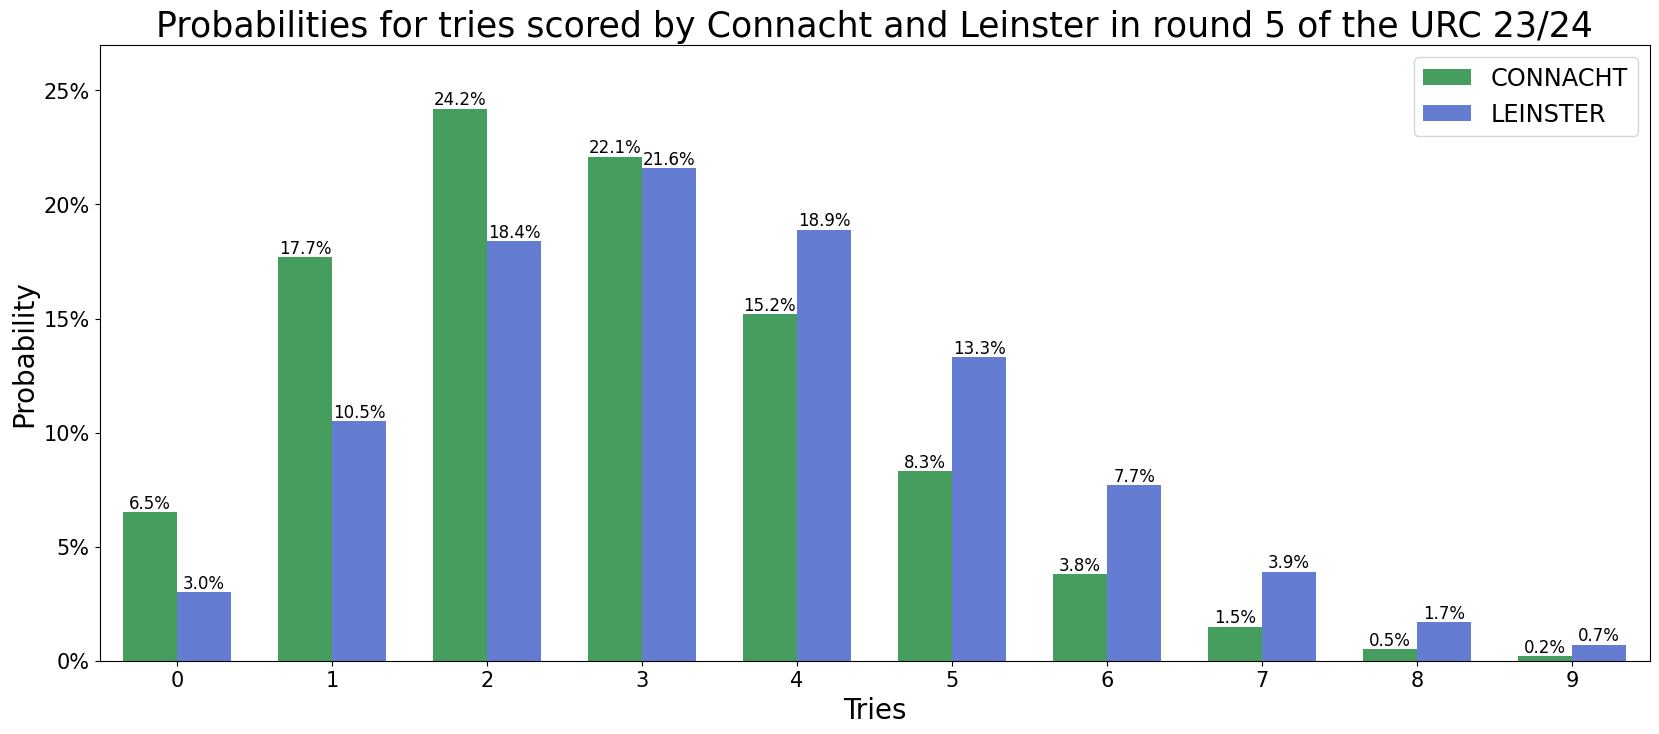

In [25]:
# create a subplot with 2 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(20, 8))

tidy = round_probs_df[['CONNACHT', 'LEINSTER', 'Number of Tries Scored']].melt(id_vars='Number of Tries Scored')
tidy.rename(columns={"variable": "Team"}, inplace=True)

# plt.grid(True)
sns.barplot(x="Number of Tries Scored", y="value", hue="Team",
            data=tidy, 
            errorbar=None, 
            fill=True,
            gap=0.01,
            width=0.7,
            palette=['#36AD56', '#5372E5'],
           orient='v')


bar_label_fontsize = 12
bars_0 = ax.containers[0]
ax.bar_label(bars_0, labels=[f'{value:.1f}%' for value in bars_0.datavalues], fontsize=bar_label_fontsize)

bars_1 = ax.containers[1]
ax.bar_label(bars_1, labels=[f'{value:.1f}%' for value in bars_1.datavalues], fontsize=bar_label_fontsize)

plt.ylim(0, 27)  # Set the y-axis limits from 0 to 5

axes_label_font_size = 20
ax.axes.set_title("Probabilities for tries scored by Connacht and Leinster in round 5 of the URC 23/24",fontsize=25)
ax.set_xlabel("Tries",fontsize=axes_label_font_size)
ax.set_ylabel("Probability",fontsize=axes_label_font_size)

ticks_font_size = 15
ax.yaxis.set_tick_params(labelsize = ticks_font_size);
ax.xaxis.set_tick_params(labelsize = ticks_font_size);
ax.legend(fontsize='xx-large')

ax.yaxis.set_major_formatter('{x:1.0f}%')

plt.show()

In [26]:
round_probs_df

,SCARLETS,BULLS,ULSTER,OSPREYS,DRAGONS,BENETTON,SHARKS,GLASGOW,CONNACHT,LEINSTER,EDINBURGH,CARDIFF,ZEBRE,LIONS,STORMERS,MUNSTER,Number of Tries Scored
Number of Tries Scored,,,,,,,,,,,,,,,,,
0,11.8,2.6,1.5,12.5,8.4,7.2,3.3,4.6,6.5,3.0,2.0,11.6,9.7,1.8,8.2,10.4,0
1,25.3,9.4,6.2,26.0,20.8,19.0,11.2,14.1,17.7,10.5,7.9,25.0,22.6,7.2,20.5,23.5,1
2,27.0,17.2,13.0,27.0,25.8,24.9,19.1,21.8,24.2,18.4,15.5,26.9,26.4,14.5,25.6,26.6,2
3,19.2,21.0,18.4,18.7,21.3,21.8,21.8,22.4,22.1,21.6,20.1,19.3,20.5,19.4,21.4,20.1,3
4,10.2,19.2,19.4,9.7,13.1,14.3,18.6,17.3,15.2,18.9,19.5,10.4,12.0,19.5,13.4,11.4,4
5,4.4,14.1,16.4,4.0,6.5,7.5,12.7,10.6,8.3,13.3,15.2,4.5,5.6,15.7,6.7,5.2,5
6,1.6,8.6,11.6,1.4,2.7,3.3,7.3,5.5,3.8,7.7,9.8,1.6,2.2,10.5,2.8,2.0,6
7,0.5,4.5,7.0,0.4,0.9,1.2,3.5,2.4,1.5,3.9,5.5,0.5,0.7,6.0,1.0,0.6,7
8,0.1,2.1,3.7,0.1,0.3,0.4,1.5,0.9,0.5,1.7,2.7,0.1,0.2,3.0,0.3,0.2,8


In [27]:
results_df

,Team,Location,Opponents,Predicted Tries,Predicted Tries Prob,Tries Scored
0,SCARLETS,Home,BULLS,2,0.269518,3.0
1,BULLS,Away,SCARLETS,4,0.192420,3.0
2,ULSTER,Home,OSPREYS,4,0.194171,6.0
3,OSPREYS,Away,ULSTER,1,0.260203,2.0
4,DRAGONS,Home,BENETTON,2,0.257840,3.0
5,BENETTON,Away,DRAGONS,3,0.218436,4.0
6,SHARKS,Home,GLASGOW,3,0.218137,3.0
7,GLASGOW,Away,SHARKS,2,0.217677,4.0
8,CONNACHT,Home,LEINSTER,2,0.242480,2.0
9,LEINSTER,Away,CONNACHT,4,0.188994,5.0


# Overall Results

In [28]:
results_df['Tries Scored'] = results_df['Tries Scored'].astype(int)
results_df['Accuracy'] = abs(results_df['Predicted Tries'] - results_df['Tries Scored'])


results_df['Accuracy'] = results_df['Accuracy'].replace({0: "Correct",
                                                        1: "1 Away",
                                                        2: "2 Away"})


results_df

,Team,Location,Opponents,Predicted Tries,Predicted Tries Prob,Tries Scored,Accuracy
0,SCARLETS,Home,BULLS,2,0.269518,3,1 Away
1,BULLS,Away,SCARLETS,4,0.192420,3,1 Away
2,ULSTER,Home,OSPREYS,4,0.194171,6,2 Away
3,OSPREYS,Away,ULSTER,1,0.260203,2,1 Away
4,DRAGONS,Home,BENETTON,2,0.257840,3,1 Away
5,BENETTON,Away,DRAGONS,3,0.218436,4,1 Away
6,SHARKS,Home,GLASGOW,3,0.218137,3,Correct
7,GLASGOW,Away,SHARKS,2,0.217677,4,2 Away
8,CONNACHT,Home,LEINSTER,2,0.242480,2,Correct
9,LEINSTER,Away,CONNACHT,4,0.188994,5,1 Away


In [29]:
results_df[['Team', 'Location', 'Opponents', 'Tries Scored', 'Predicted Tries',
       'Accuracy']].sort_values(by=['Accuracy', 'Location'], ascending=[True, False])

,Team,Location,Opponents,Tries Scored,Predicted Tries,Accuracy
0,SCARLETS,Home,BULLS,3,2,1 Away
4,DRAGONS,Home,BENETTON,3,2,1 Away
10,EDINBURGH,Home,CARDIFF,4,3,1 Away
1,BULLS,Away,SCARLETS,3,4,1 Away
3,OSPREYS,Away,ULSTER,2,1,1 Away
5,BENETTON,Away,DRAGONS,4,3,1 Away
9,LEINSTER,Away,CONNACHT,5,4,1 Away
2,ULSTER,Home,OSPREYS,6,4,2 Away
12,ZEBRE,Home,LIONS,0,2,2 Away
14,STORMERS,Home,MUNSTER,4,2,2 Away
